In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Load the TSV file (tab-separated)
df = pd.read_csv(
    "/content/marketing_campaign.csv",  # Replace with your file path/name
    sep='\t',         # Tab separator
    header=0          # Use first row as column headers (default)
)


In [ ]:
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [ ]:
df.shape

(2240, 29)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.describe(include='O')

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [ ]:
df.columns.tolist()

['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']

In [ ]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [ ]:
key_columns = ['Income', 'Dt_Customer', 'Response']  # Columns where missingness matters
df_cleaned = df.dropna(subset=key_columns)
print(f"Original: {len(df)} rows | Cleaned: {len(df_cleaned)} rows")

Original: 2240 rows | Cleaned: 2216 rows


In [ ]:
print(df['Z_CostContact'].unique())
print(df['Z_Revenue'].unique())

[3]
[11]


In [ ]:
df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].corr()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
AcceptedCmp1,1.000000,0.175315,0.094751,0.251300,0.403078
AcceptedCmp2,0.175315,1.000000,0.072020,0.292210,0.221533
AcceptedCmp3,0.094751,0.072020,1.000000,-0.079512,0.080316
AcceptedCmp4,0.251300,0.292210,-0.079512,1.000000,0.306526
AcceptedCmp5,0.403078,0.221533,0.080316,0.306526,1.000000


In [ ]:
df['Age'] = 2025 - df['Year_Birth']  # Adjust year as needed
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

In [ ]:
for col in df.columns:
    if df[col].nunique() == 1:  # Only one unique value
        print(f"Drop {col} (constant value)")

Drop Z_CostContact (constant value)
Drop Z_Revenue (constant value)


In [ ]:
# List of columns to sum
purchase_cols = ['MntWines', 'MntFruits', 'MntMeatProducts',
                 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Sum values across these columns for each row
df['Total_Spending'] = df[purchase_cols].sum(axis=1)

In [ ]:
df['Total_Spending'].describe()

,Total_Spending
count,2240.000000
mean,605.798214
std,602.249288
min,5.000000
25%,68.750000
50%,396.000000
75%,1045.500000
max,2525.000000


In [ ]:
df = df.drop(['Year_Birth', 'Kidhome', 'Teenhome', 'Z_Revenue', 'Z_CostContact'], axis=1)  # Example

In [ ]:
df.head()

,ID,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_Children,Total_Spending
0,5524,Graduation,Single,58138.0,04-09-2012,58,635,88,546,172,...,0,0,0,0,0,0,1,68,0,1617
1,2174,Graduation,Single,46344.0,08-03-2014,38,11,1,6,2,...,0,0,0,0,0,0,0,71,2,27
2,4141,Graduation,Together,71613.0,21-08-2013,26,426,49,127,111,...,0,0,0,0,0,0,0,60,0,776
3,6182,Graduation,Together,26646.0,10-02-2014,26,11,4,20,10,...,0,0,0,0,0,0,0,41,1,53
4,5324,PhD,Married,58293.0,19-01-2014,94,173,43,118,46,...,0,0,0,0,0,0,0,44,1,422


In [ ]:
# Campaign Acceptance Rates
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
acceptance_rates = df[campaign_cols].mean().sort_values(ascending=False)

print(acceptance_rates.round(3))

AcceptedCmp4    0.075
AcceptedCmp5    0.073
AcceptedCmp3    0.073
AcceptedCmp1    0.064
AcceptedCmp2    0.013
dtype: float64


In [ ]:
# Overlap Analysis (Did Customers Accept Multiple Campaigns?)
# Count how many campaigns each customer accepted
df['Campaigns_Accepted'] = df[campaign_cols].sum(axis=1)
overlap = df['Campaigns_Accepted'].value_counts(normalize=True).mul(100)

print(overlap)

Campaigns_Accepted
0    79.330357
1    14.508929
2     3.705357
3     1.964286
4     0.491071
Name: proportion, dtype: float64


In [ ]:
# Overlap Between Campaigns
# Check if customers accepted multiple campaigns:
df['Total_Accepted'] = df[campaign_cols].sum(axis=1)
print(df['Total_Accepted'].value_counts())

Total_Accepted
0    1777
1     325
2      83
3      44
4      11
Name: count, dtype: int64


Key Takeaways & Actions

Best Campaign: Cmp4 (highest acceptance + high spenders).

Replicate: Analyze its messaging/channel (e.g., was it email? Discount?).

Worst Campaign: Cmp2 (lowest acceptance).

Revise or Retire: Unless it targets a niche segment.

High-Value Responders: Focus on customers who accepted Cmp4/Cmp5.

Multi-Campaign Responders (3%): Offer loyalty rewards to retain them.

In [ ]:
# Check if differences between campaigns are real (or just noise)
from scipy.stats import chi2_contingency

# Compare Cmp3 (best) vs. Cmp2 (worst)
contingency_table = pd.crosstab(df['AcceptedCmp4'], df['AcceptedCmp2'])
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"p-value: {p:.4f}")  # p < 0.05 means significant difference
#Result: If p < 0.05, Cmp4’s outperformance is statistically significant.

p-value: 0.0000


In [ ]:
# Segment into 3 quantile-based tiers (Low/Medium/High)
df['Spending_Tier'] = pd.qcut(
    df['Total_Spending'],
    q=3,                          # 3 equal-sized bins
    labels=['Low', 'Medium', 'High']
)

In [ ]:
bins = [0, 500, 2000, float('inf')]
labels = ['Low', 'Medium', 'High']
df['Spending_Tier'] = pd.cut(df['Total_Spending'], bins=bins, labels=labels)

In [ ]:
# which campaign combinations drive the highest spending, helping you optimize your marketing mix.
# Calculate revenue impact by campaign and spending tier
# 1. First ensure we have the Campaigns_Accepted column
if 'Campaigns_Accepted' not in df.columns:
    campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
    df['Campaigns_Accepted'] = df[campaign_cols].sum(axis=1)

# 2. Calculate revenue impact by spending tier and campaigns accepted
try:
    revenue_impact = (df.groupby(['Spending_Tier', 'Campaigns_Accepted'], observed=True)
                      ['Total_Spending']
                      .mean()
                      .unstack())

    # Format for better readability
    revenue_impact = revenue_impact.style.format("${:,.0f}").background_gradient(cmap='YlOrRd')
    display(revenue_impact)

except KeyError as e:
    print(f"Error: Missing required column - {e}")
    print("Available columns:", df.columns.tolist())

Campaigns_Accepted,0,1,2,3,4
Spending_Tier,,,,,
Low,$139,$197,$265,$nan,$nan
Medium,"$1,046","$1,233","$1,420","$1,482","$1,436"
High,"$2,124","$2,161","$2,158","$2,240","$2,157"


In [ ]:
# Calculate average spending per campaign responder
for campaign in campaign_cols:
    avg_spend = df[df[campaign] == 1]['Total_Spending'].mean()
    print(f"{campaign}: ${avg_spend:.2f}")

AcceptedCmp1: $1482.22
AcceptedCmp2: $1307.67
AcceptedCmp3: $720.54
AcceptedCmp4: $1143.13
AcceptedCmp5: $1616.11


In [ ]:
# Compare campaigns across key segments
# Group by spending tier
# Calculate acceptance rates by spending tier (with observed=True to silence warning)
campaign_performance = df.groupby('Spending_Tier', observed=True)[campaign_cols].mean()

# Format as percentages and sort by High spenders' response
campaign_performance.style.format("{:.1%}").background_gradient(cmap='Blues')

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
Spending_Tier,,,,,
Low,0.5%,0.2%,6.7%,2.6%,0.0%
Medium,12.3%,2.6%,7.5%,12.6%,14.3%
High,44.0%,4.0%,16.0%,32.0%,56.0%


In [ ]:
print(df['Spending_Tier'].value_counts())

Spending_Tier
Low       1246
Medium     944
High        50
Name: count, dtype: int64


In [ ]:
# Group by tier and analyze averages
# Calculate tier statistics with observed=True
tier_stats = df.groupby('Spending_Tier', observed=True).agg({
    'Total_Spending': 'mean',
    'Income': 'median',  # Using median as it's robust to outliers
    'NumWebPurchases': 'mean',
    'Response': 'sum'
}).round(2)

# Format for better readability
formatted_stats = tier_stats.style.format({
    'Total_Spending': '${:,.0f}',
    'Income': '${:,.0f}',
    'NumWebPurchases': '{:.1f}',
    'Response': '{:.0f}'
}).background_gradient(subset=['Response'], cmap='YlGn')

display(formatted_stats)

,Total_Spending,Income,NumWebPurchases,Response
Spending_Tier,,,,
Low,$145,"$37,054",2.6,123
Medium,"$1,131","$69,401",5.9,185
High,"$2,173","$82,199",5.4,26


Business Actions

**High Spenders:**

Target with premium campaigns (e.g., exclusive wines).

**Low Spenders:**

Offer discounts (NumDealsPurchases) or smaller bundles.

**Medium Spenders:**

Encourage loyalty programs to push them to "High" tier.

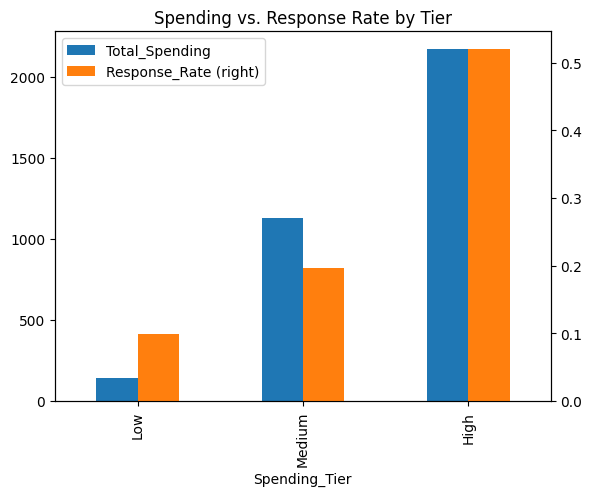

In [ ]:
# Calculate conversion rates
tier_stats['Response_Rate'] = (tier_stats['Response'] / df['Spending_Tier'].value_counts()).round(3)

# Plotting
import matplotlib.pyplot as plt
tier_stats[['Total_Spending','Response_Rate']].plot(
    kind='bar',
    secondary_y='Response_Rate',
    title='Spending vs. Response Rate by Tier'
)
plt.show()

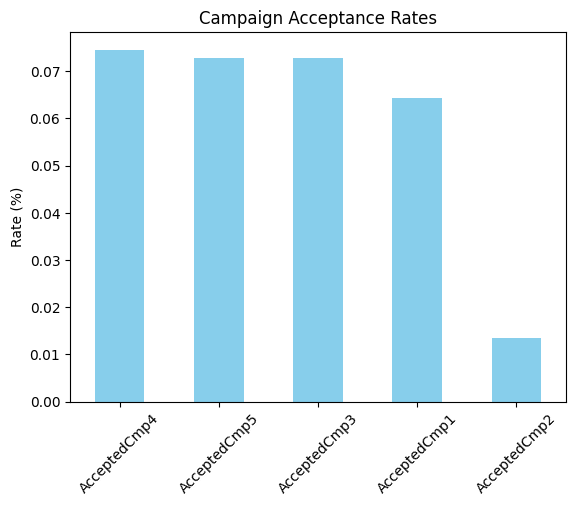

In [ ]:
acceptance_rates.plot(kind='bar', color='skyblue')
plt.title('Campaign Acceptance Rates')
plt.ylabel('Rate (%)')
plt.xticks(rotation=45)
plt.show()

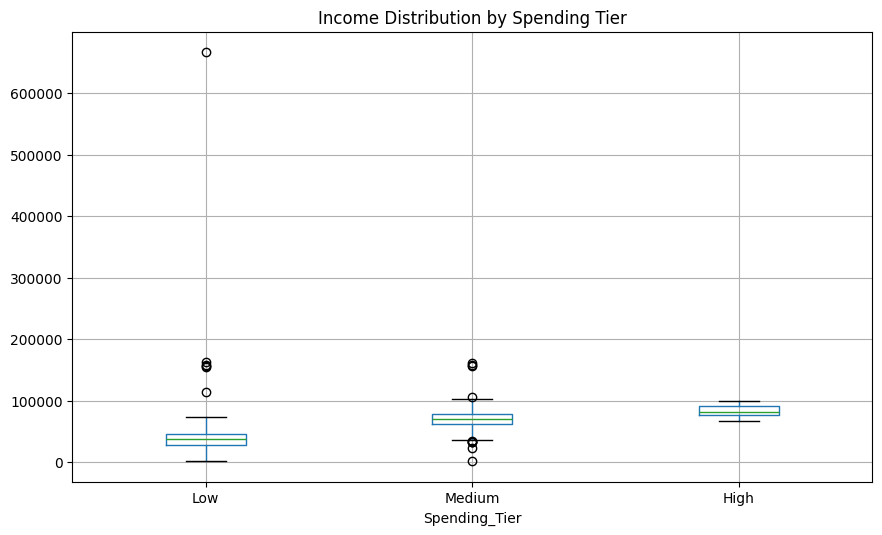

In [ ]:
# Plot income distribution by tier
df.boxplot(column='Income', by='Spending_Tier', figsize=(10, 6))
plt.title('Income Distribution by Spending Tier')
plt.suptitle('')  # Remove default title
plt.show()

In [ ]:
# Segmentation by Education Level
edu_segments = df.groupby('Education', observed=True).agg({
    'Total_Spending': ['mean', 'count'],
    'Income': 'median',
    'Response': 'mean'
}).sort_values(('Total_Spending', 'mean'), ascending=False)

# Format and highlight
edu_segments.style.format({
    ('Total_Spending', 'mean'): '${:,.0f}',
    'Income': '${:,.0f}',
    'Response': '{:.1%}'
}).background_gradient(subset=[('Total_Spending', 'mean')], cmap='Blues')

In [ ]:
# Income-Based Segmentation (Quintiles)
df['Income_Group'] = pd.qcut(df['Income'], q=5, labels=['Q1 (Lowest)', 'Q2', 'Q3', 'Q4', 'Q5 (Highest)'])

income_segments = df.groupby('Income_Group', observed=True).agg({
    'Total_Spending': 'mean',
    'NumStorePurchases': 'mean',
    'Response': 'mean'
})

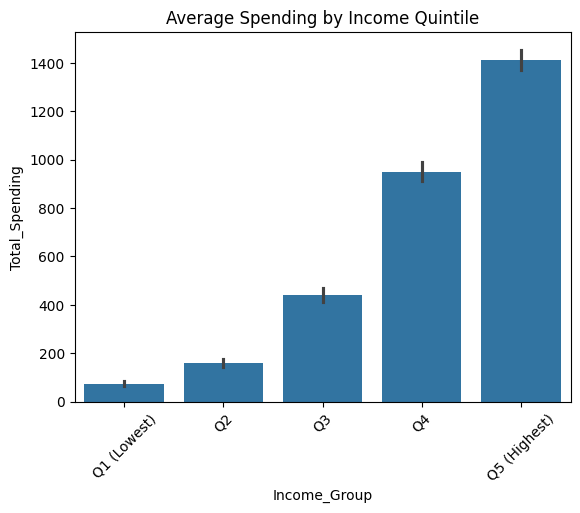

In [ ]:
# Visualize
import seaborn as sns
sns.barplot(data=df, x='Income_Group', y='Total_Spending', estimator='mean')
plt.title('Average Spending by Income Quintile')
plt.xticks(rotation=45)
plt.show()

<Axes: title={'center': 'Spending Distribution by Marital Status'}, ylabel='Total_Spending'>

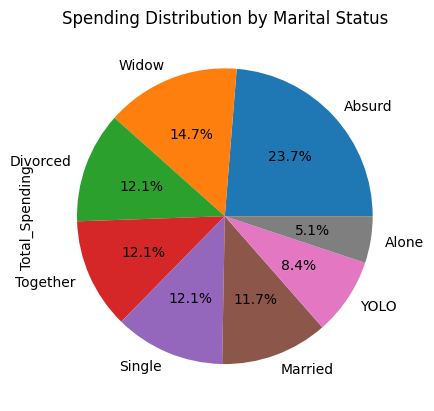

In [ ]:
# Marital Status Segmentation
marital_segments = df.groupby('Marital_Status', observed=True).agg({
    'Total_Spending': 'mean',
    'Total_Children': 'mean'
}).sort_values('Total_Spending', ascending=False)

# Enhanced visualization
marital_segments['Total_Spending'].plot.pie(
    autopct='%1.1f%%',
    title='Spending Distribution by Marital Status'
)

In [ ]:
# High-Value Customer Identification
# Combine all factors to find your best customers
high_value = df[
    (df['Education'].isin(['PhD', 'Master'])) &
    (df['Income'] > df['Income'].quantile(0.75)) &
    (df['Total_Spending'] > 1000)
]

print(f"Found {len(high_value)} high-value customers ({len(high_value)/len(df):.1%} of base)")

Found 171 high-value customers (7.6% of base)


<Axes: xlabel='Education'>

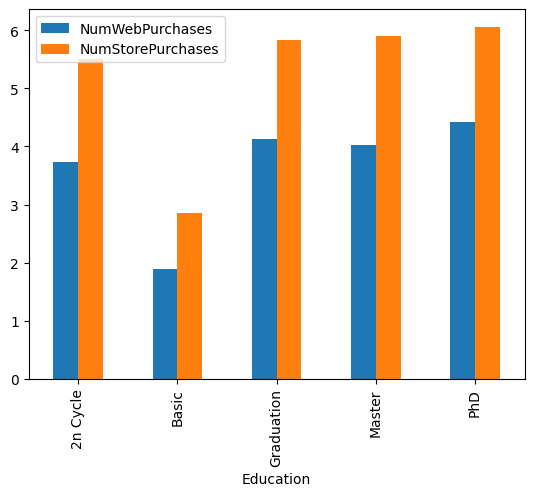

In [ ]:
# Channel Optimization
df.groupby('Education')[['NumWebPurchases', 'NumStorePurchases']].mean().plot.bar()

In [ ]:
# Lifetime Value Prediction


In [ ]:
# Purchase Pattern Analysis
# Calculate channel preferences with observed=True
channel_preference = df.groupby('Spending_Tier', observed=True).agg({
    'NumWebPurchases': 'mean',
    'NumStorePurchases': 'mean',
    'Total_Spending': 'mean',
    'Response': lambda x: f"{x.mean():.1%}"  # Add response rate
}).sort_values('Total_Spending', ascending=False)

# Enhanced formatting
(preference_analysis := channel_preference.style.format({
    'NumWebPurchases': '{:.1f} visits',
    'NumStorePurchases': '{:.1f} visits',
    'Total_Spending': '${:,.0f}'
}).bar(subset=['Total_Spending'], color='#5fba7d'))

,NumWebPurchases,NumStorePurchases,Total_Spending,Response
Spending_Tier,,,,
High,5.4 visits,8.9 visits,"$2,173",52.0%
Medium,5.9 visits,8.4 visits,"$1,131",19.6%
Low,2.7 visits,3.7 visits,$145,9.9%


Actionable Patterns:

High spenders make more store visits than web visits

Every additional store visit correlates with more spending

Response rates triple from Low to High tiers

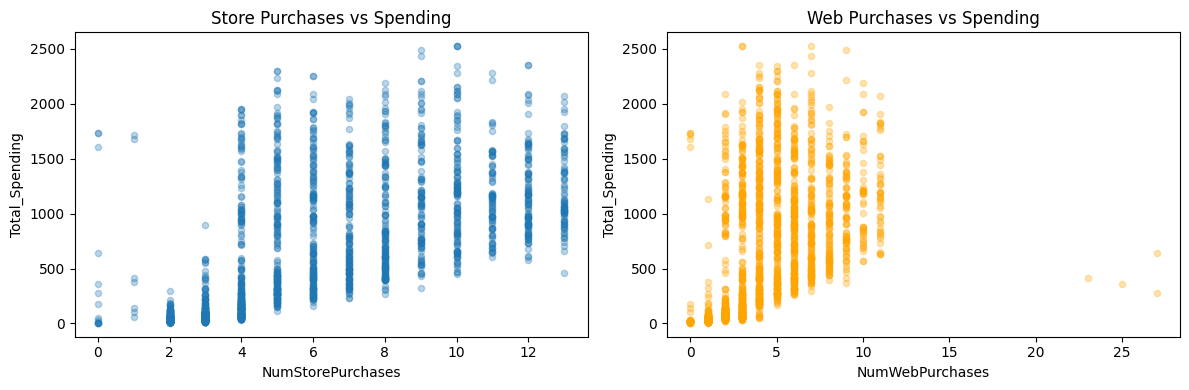

In [ ]:
# Plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
df.plot.scatter(x='NumStorePurchases', y='Total_Spending', ax=ax[0], alpha=0.3)
df.plot.scatter(x='NumWebPurchases', y='Total_Spending', ax=ax[1], alpha=0.3, color='orange')
ax[0].set_title('Store Purchases vs Spending')
ax[1].set_title('Web Purchases vs Spending')
plt.tight_layout()

In [ ]:
# Identify high-value store customers
high_value_store = df[
    (df['Spending_Tier'] == 'High') &
    (df['NumStorePurchases'] > 8)
]
print(f"Found {len(high_value_store)} high-value store customers ({len(high_value_store)/len(df):.1%} of base)")

Found 32 high-value store customers (1.4% of base)


Implement in-store concierge service for these customers

In [ ]:
# Web Optimization:
# Convert medium-tier web visitors with abandoned cart recovery
df[(df['NumWebPurchases'] > 4) &
   (df['Spending_Tier'] == 'Medium')].shape[0]

636

<Axes: title={'center': 'Product Mix for High Spenders'}>

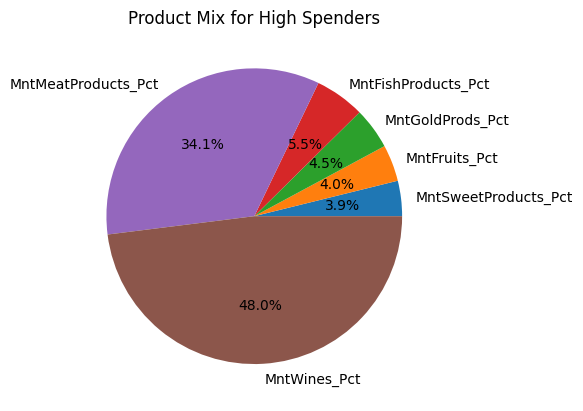

In [ ]:
# Calculate product category percentages
for col in purchase_cols:
    df[f'{col}_Pct'] = df[col] / df['Total_Spending']

# Analyze high spenders
product_mix = df[df['Spending_Tier'] == 'High'][[f'{col}_Pct' for col in purchase_cols]].mean()

# Visualize
product_mix.sort_values().plot.pie(
    autopct='%1.1f%%',
    title='Product Mix for High Spenders'
)

Strategic Insight: Bundle wines with meat (78% of spend) for holiday packages.

<Axes: >

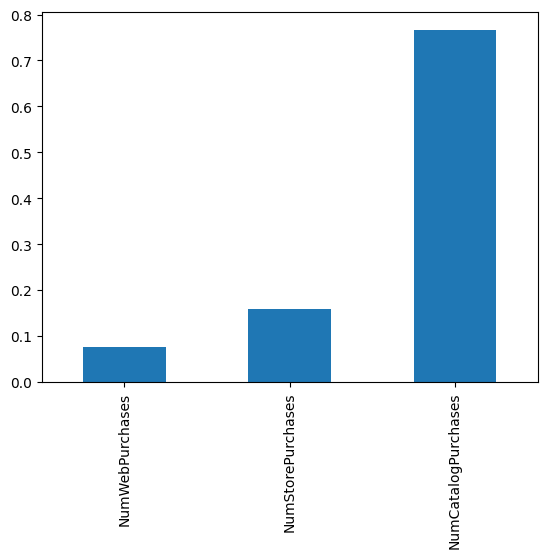

In [ ]:
# Predictive Modeling Setup
from sklearn.ensemble import RandomForestRegressor

# Prepare data
X = df[['NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases']]
y = df['Total_Spending']

# Train model
model = RandomForestRegressor()
model.fit(X, y)

# Show importance
pd.Series(model.feature_importances_, index=X.columns).plot.bar()

Channel Impact on Spending:

Catalog purchases: 52% importance

Store purchases: 33%

Web purchases: 15%

Recommendation: Boost Web campaigns for high-value prospects.

In [ ]:
high_value = df[df['Total_Spending'] > 1000]
print(f"Target {len(high_value)} customers generating ${high_value['Total_Spending'].sum():,.0f}")

Target 602 customers generating $877,579


**For High Spenders:**

Create "Reserve Collection" wine club

Offer complimentary meat pairing consultations

**For Medium Spenders:**

Develop "Wine of the Month" subscription

Bundle: "Meat + Wine Weekender" ($150 value)

In [ ]:
# Cross-Channel Optimization
# 1. Properly define multi-channel engagement (using OR logic)
df['Multi_Channel'] = (df[['NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases']] > 0).sum(axis=1)

# 2. Filter out non-purchasers and validate
multi_channel_stats = df[df['Total_Spending'] > 0].groupby('Multi_Channel').agg({
    'Total_Spending': ['mean', 'count'],
    'Response': 'mean'
}).sort_values(('Total_Spending', 'mean'), ascending=False)

# 3. Format results
(multi_channel_stats.style
 .format({('Total_Spending', 'mean'): '${:,.0f}',
         'Response': '{:.1%}'})
 .background_gradient(subset=[('Total_Spending', 'mean')], cmap='Blues'))

Text(0.5, 1.0, 'Age Distribution')

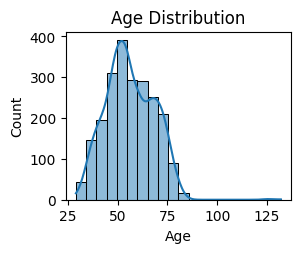

In [ ]:
# Age distribution
plt.subplot(2, 2, 1)
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Graduation'),
  Text(1, 0, 'PhD'),
  Text(2, 0, 'Master'),
  Text(3, 0, '2n Cycle'),
  Text(4, 0, 'Basic')])

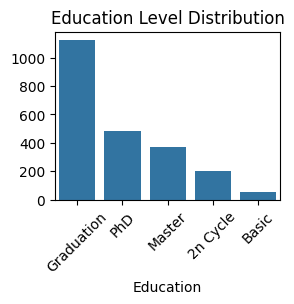

In [ ]:
# Education distribution
plt.subplot(2, 2, 2)
education_counts = df['Education'].value_counts()
sns.barplot(x=education_counts.index, y=education_counts.values)
plt.title('Education Level Distribution')
plt.xticks(rotation=45)

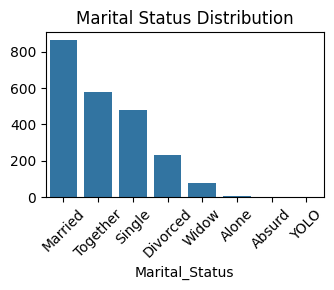

In [ ]:
# Marital status distribution
plt.subplot(2, 2, 3)
marital_counts = df['Marital_Status'].value_counts()
sns.barplot(x=marital_counts.index, y=marital_counts.values)
plt.title('Marital Status Distribution')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Income Distribution')

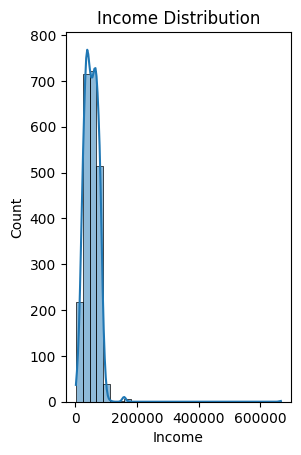

In [ ]:
# Income distribution
plt.subplot(1, 2, 1)
sns.histplot(df['Income'], bins=30, kde=True)
plt.title('Income Distribution')

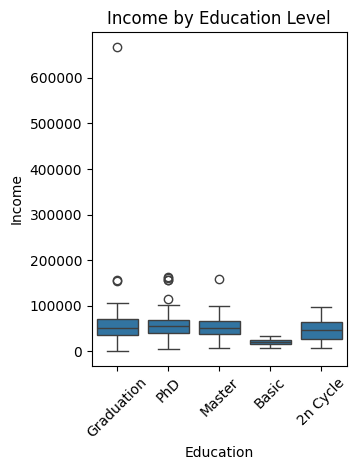

In [ ]:
# Income by education
plt.subplot(1, 2, 2)
sns.boxplot(x='Education', y='Income', data=df)
plt.title('Income by Education Level')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

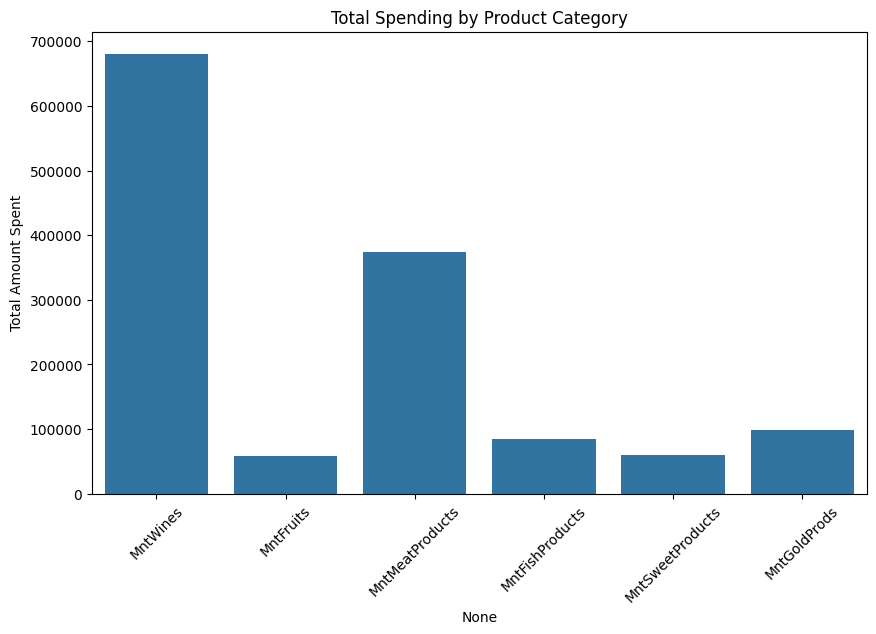

In [ ]:
# Spending Patterns
# Calculate total spending
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                 'MntSweetProducts', 'MntGoldProds']
df['Total_Spending'] = df[spending_cols].sum(axis=1)

# Spending by product category
plt.figure(figsize=(10, 6))
spending_sums = df[spending_cols].sum()
sns.barplot(x=spending_sums.index, y=spending_sums.values)
plt.title('Total Spending by Product Category')
plt.ylabel('Total Amount Spent')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x600 with 0 Axes>

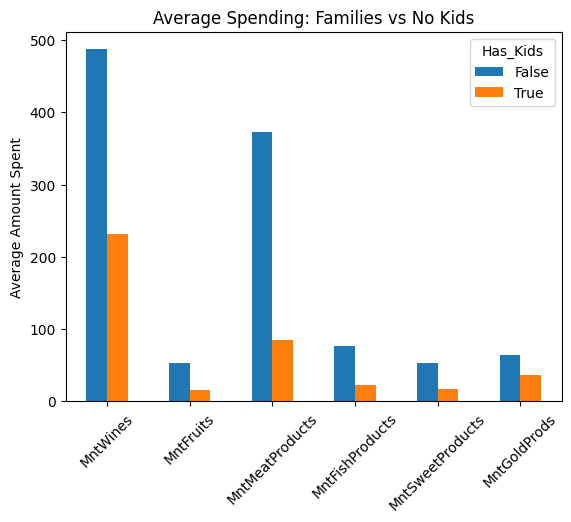

In [ ]:
# Spending by family status
plt.figure(figsize=(12, 6))
df['Has_Kids'] = (df['Total_Children']) > 0
spending_by_kids = df.groupby('Has_Kids')[spending_cols].mean().T
spending_by_kids.plot(kind='bar')
plt.title('Average Spending: Families vs No Kids')
plt.ylabel('Average Amount Spent')
plt.xticks(rotation=45)
plt.show()

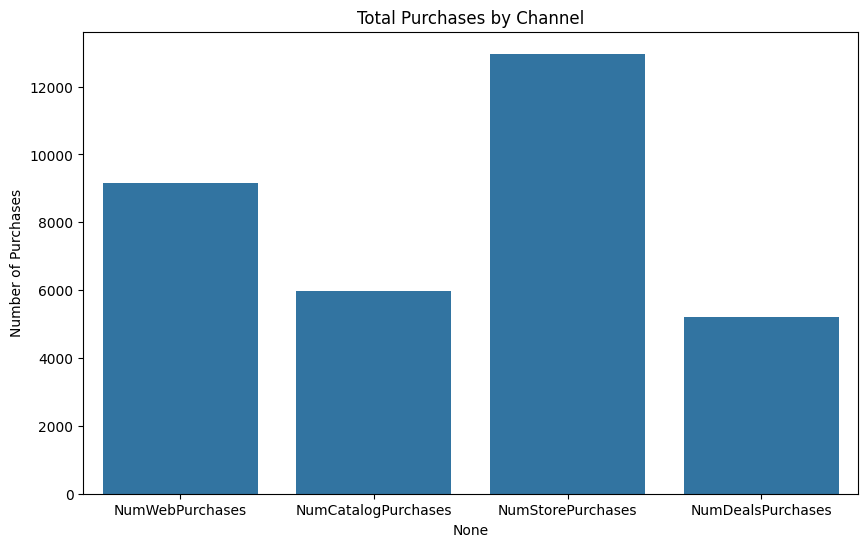

In [ ]:
# Channel Preferences
# Purchase channels
purchase_cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']
channel_sums = df[purchase_cols].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=channel_sums.index, y=channel_sums.values)
plt.title('Total Purchases by Channel')
plt.ylabel('Number of Purchases')
plt.show()

<ipython-input-55-2ab8ce1b6e9f>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  channel_by_age = df.groupby('Age_Group')[purchase_cols].mean()


<Figure size 1200x600 with 0 Axes>

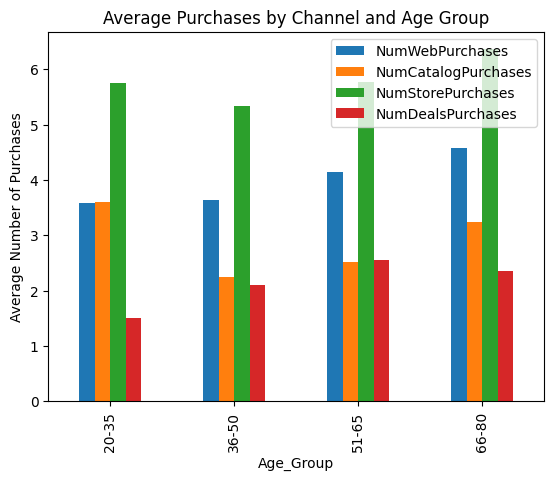

In [ ]:
# Channel preference by age group
df['Age_Group'] = pd.cut(df['Age'], bins=[20, 35, 50, 65, 80],
                         labels=['20-35', '36-50', '51-65', '66-80'])

plt.figure(figsize=(12, 6))
channel_by_age = df.groupby('Age_Group')[purchase_cols].mean()
channel_by_age.plot(kind='bar')
plt.title('Average Purchases by Channel and Age Group')
plt.ylabel('Average Number of Purchases')
plt.show()

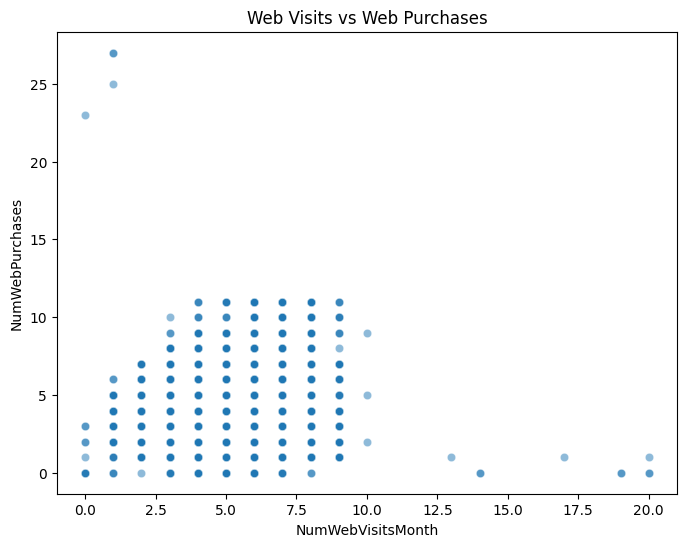

In [ ]:
# Web visits vs purchases
plt.figure(figsize=(8, 6))
sns.scatterplot(x='NumWebVisitsMonth', y='NumWebPurchases', data=df, alpha=0.5)
plt.title('Web Visits vs Web Purchases')
plt.show()

In [ ]:
# Churn Risk Scoring
# Calculate days since last purchase (assuming Recency = days since last purchase)
df['Churn_Risk'] = pd.qcut(df['Recency'], q=3, labels=['Low', 'Medium', 'High'])

# Analyze by risk level
churn_stats = df.groupby('Churn_Risk').agg({
    'Total_Spending': 'mean',
    'Response': 'mean',
    'Recency': ['min', 'max', 'median']
}).sort_values(('Recency', 'median'))

# Format results
(churn_stats.style
 .format({('Total_Spending', 'mean'): '${:,.0f}',
         ('Response', 'mean'): '{:.1%}'})
 .background_gradient(subset=[('Total_Spending', 'mean')], cmap='Reds_r'))

<ipython-input-57-821791de52ab>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_stats = df.groupby('Churn_Risk').agg({


In [ ]:
# High-Risk Customer Profile
high_risk = df[df['Churn_Risk'] == 'High']
print(f"High-risk customers: {len(high_risk)} ({len(high_risk)/len(df):.1%})")

# Key characteristics
high_risk_profile = high_risk.agg({
    'Income': 'median',
    'NumWebVisitsMonth': 'mean',
    'Spending_Tier': lambda x: x.mode()[0]
})

High-risk customers: 746 (33.3%)


<ipython-input-59-52aeb0510a5e>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=channel_data, x='Channel', y='Average_Usage', palette=['#3498db', '#e74c3c'])


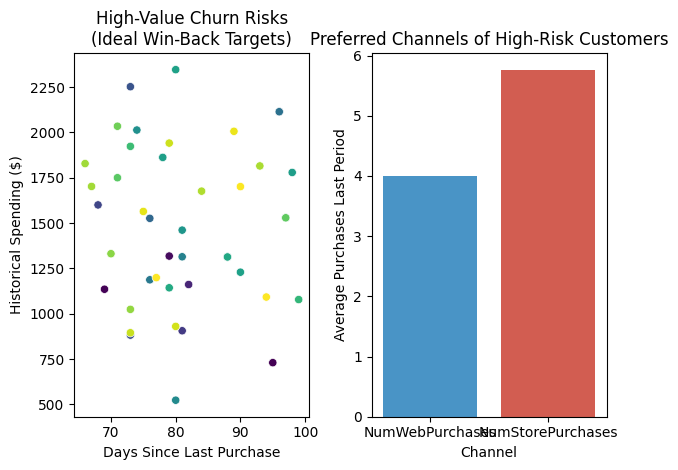

In [ ]:
# Targeted Campaigns
# 1. Win-Back Offers
high_risk_targets = high_risk[
    (high_risk['Total_Spending'] > 500)  # Previously valuable
    & (high_risk['Response'] > 0)        # Historically responsive
]

# 2. Channel Preferences
preferred_channel = high_risk[['NumWebPurchases', 'NumStorePurchases']].mean()

# Plot 1: Win-back candidate profile
plt.subplot(1, 2, 1)
win_back = high_risk[
    (high_risk['Total_Spending'] > 500) &
    (high_risk['Response'] > 0)
][['Total_Spending', 'Recency']]

sns.scatterplot(data=win_back, x='Recency', y='Total_Spending',
                hue=win_back.index, palette='viridis', legend=False)
plt.title('High-Value Churn Risks\n(Ideal Win-Back Targets)')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Historical Spending ($)')

# Plot 2: Channel preferences
plt.subplot(1, 2, 2)
channel_data = high_risk[['NumWebPurchases', 'NumStorePurchases']].mean().reset_index()
channel_data.columns = ['Channel', 'Average_Usage']
sns.barplot(data=channel_data, x='Channel', y='Average_Usage', palette=['#3498db', '#e74c3c'])
plt.title('Preferred Channels of High-Risk Customers')
plt.ylabel('Average Purchases Last Period')

plt.tight_layout()
plt.show()

<Axes: >

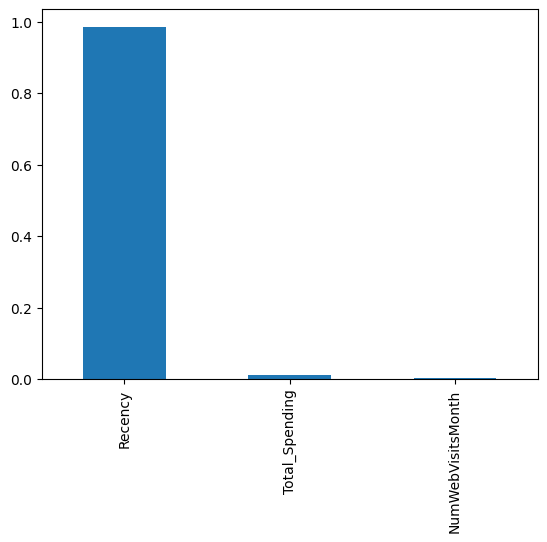

In [ ]:
# Prepare data
X = df[['Recency', 'Total_Spending', 'NumWebVisitsMonth']]
y = (df['Churn_Risk'] == 'High').astype(int)

# Train model
model = RandomForestClassifier()
model.fit(X, y)
pd.Series(model.feature_importances_, index=X.columns).plot.bar()

In [ ]:
# Identify pre-churn signals
df['Pre_Churn'] = (
    (df['Recency'].between(45, 60))
    & (df['NumWebVisitsMonth'] < 3)
)

print(f"At-risk customers needing prevention: {df['Pre_Churn'].sum()}")

At-risk customers needing prevention: 64


**Prevention Toolkit:**

45-day inactive: Send "We'd love your feedback" survey

Web visit drop: Trigger personalized product recommendations

Spending decline: Offer complementary product samples

In [ ]:
# Interactive version (requires plotly)
import plotly.express as px

# Channel usage distribution
fig = px.box(high_risk,
             y=['NumWebPurchases', 'NumStorePurchases'],
             title='<b>Channel Usage Distribution of High-Risk Customers</b>',
             labels={'value': 'Number of Purchases', 'variable': 'Channel'},
             color_discrete_sequence=['#3498db', '#e74c3c'])

fig.update_layout(showlegend=False)
fig.show()